Name: Neha Kale  
UID: 2018130018


Implementing LDA and Naive Bayes Classifier using Spam SMS Collection Dataset

#### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading the dataset

In [ ]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'messages']
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (5572, 2)


The dataset has 5572 rows and 2 columns

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

There are two unique target labels - ham and spam. And among both of them 'ham' is the more frequent one.

In [ ]:
pd.Series(df["message"]).is_unique


False

Not all messages are unique this means we have some repeated messages 

### Exploratory Data Analysis

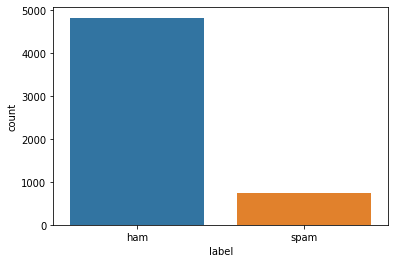

In [ ]:
sns.countplot(data=df, x='label')

The dataset is a bit skewed as the distribution of the target variable is not uniform

Lets see if message length has any effect on target variable.

In [ ]:
# Adding a new feature called length which has the length of the message
df['length'] = df["messages"].apply(len)

In [ ]:
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Distribution of ham and spam with respect to the length 

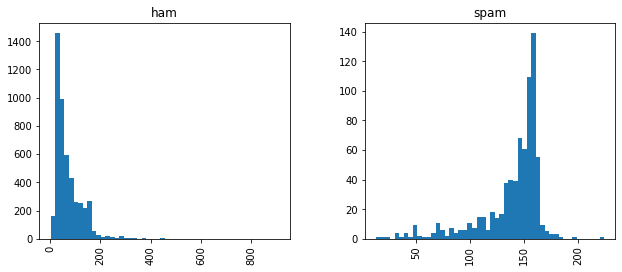

In [ ]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.show()

Thus we can observe length affects the type with Spam messages tend to have greater length




### Data Preprocessing

1. Convert the textual meta-data into a suitable (e.g. corpus) object.

2. Triage some of the irrelevant punctuation and other symbols in the corpus document,change all text to lower case, etc.

3. Tokenize the job descriptions into words. Examine the distributions of two important features

4. Classify attributes in two categories.

5. Graphically visualize the difference between low and high value of targeted feature graph.

6. Transform the features into categorical data

7. Ignore those low frequency words and report the sparsity of your categorical data matrix with or without delete those low frequency words. Note that the sparsity of a matrix is the fraction:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer

def preprocess(text):
    # Converting to lowercase
    text = text.lower()
    # Removing punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # Removing stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Applying stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]

    return text

In [ ]:
df.iloc[0]['messages']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
preprocess(df.iloc[0]['messages'])

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [ ]:
for message in df["messages"]:
  preprocess(message)

### Splitting into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Employing the Bag of Words model using Count Vectorizer to create sparse matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

The preprocess function written above is in-built in CountVectorizer. Hence there is no need to implement it again.

In [ ]:
training_data = count_vector.fit_transform(X_train) # Fitting the vectorizer to the training data
testing_data = count_vector.transform(X_test)  # Transforming the training data

In [ ]:
count_vector.get_feature_names()[-500:-450] # This will give all the word feature names, for simplicity only 50 have been shown

In [ ]:
training_data.toarray()

Above is the sparse matrix to be used as training data

In [ ]:
len(count_vector.get_feature_names())

In [ ]:
training_data.toarray().shape

The sparse matrix has 4457 rows corresponding to each message in the training data and 7612 columns corresponding to each unique word feature

In [ ]:
from numpy import count_nonzero
sparsity = 1.0 - ( training_data.count_nonzero() / float(training_data.toarray().size) )

In [ ]:
print('Sparisity of training data matrix =',sparsity)

### Model Selection/Training and Evaluation

#### Using only Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, predictions, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, predictions, pos_label='ham')))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

Specificity: The metric that evaluates a model’s ability to predict true negatives of each available category.

Sensitivity/Recall: The metric that evaluates a model’s ability to predict true positives of each available category. 

In [ ]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
print(classification_report(y_test, predictions))

#### Using only Linear Discriminant Analysis Classifier

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(training_data.toarray(),y_train)

In [ ]:
pred_lda = lda.predict(testing_data.toarray())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_lda)))
print('Precision score: {}'.format(precision_score(y_test, pred_lda, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, pred_lda, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, pred_lda, pos_label='ham')))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, pred_lda).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [ ]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

In [ ]:
print(confusion_matrix(y_test, pred_lda))

In [ ]:
print(classification_report(y_test, pred_lda))

The overall accuracy has dropped compared to using Naive Bayes approach alone

#### Using Linear Discriminant Analysis and Naive Bayes

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
X_train_lda = lda.fit_transform(training_data.toarray(),y_train) # Fitting and transforming train data using LDA

In [ ]:
X_test_lda = lda.transform(testing_data.toarray()) # Transforming test data using LDA

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_train_lda,y_train)

predictions2 = naive_bayes2.predict(X_test_lda)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions2)))
print('Precision score: {}'.format(precision_score(y_test, predictions2, pos_label='ham')))
print('Recall score: {}'.format(recall_score(y_test, predictions2, pos_label='ham')))
print('F1 score: {}'.format(f1_score(y_test, predictions2, pos_label='ham')))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions2).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [ ]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

In [ ]:
print(confusion_matrix(y_test, predictions2))

In [ ]:
print(classification_report(y_test, predictions2))

The overall accuracy has dropped compared to using Naive Bayes approach alone but is better than using LDA alone

### Conclusion

- I understood how to apply Naive Bayes algorithm to an NLP dataset.
- I also learnt various basic steps involved in the preprocessing of NLP corpus.
- I applied LDA and compared the results with the results obtained after using Naive Bayes without LDA.

--------------------------------------------------------------------------------------------------------